# Predicting Game Newsletter Subscription Using Player Characteristics and Behavior 

## Introduction: 
In many industries, it is crucial to understand their target audience and their behaviours as a means to alter and create a product or service that is beneficial to many. More specifically, game publishers and developers must thoroughly understand player behaviour. Not only does it enable businesses to market and advertise their product and/or services effectively, but it also can enhance player engagement and even customize experiences. Outside of games, a newsletter that requires a subscription is one of the many ways game publishers and developers can interact with users beyond the game itself. This project will explore which in-game behaviours and players' attributes predict a player's decision to sign up for a newsletter. 


## Question

To investigate and explore which in-game behaviours and player attributes can predict a player's decision to subscribe to a newsletter, this project will aim to answer the question: 
Can a player's total playtime, session frequency and age predict whether they will subscribe to a game-related newsletter? 


## Data Description 


To answer the predictive question above, this project utilizes, extracts and modifies data from two different datasets: players.csv and sessions.csv 

### players.csv
The players.csv file contains 196 rows and 7 columns (i.e., 196 observations and 7 variables). It contains and captures information regarding player demographics and subscription status. 

### sessions.csv
The sessions.csv file contains 1535 rows and five columns (i.e., 1535 observations and five variables). It mainly logs and keeps records of gameplay sessions. In other words, it contains a time-stamped session activity.



### Variables from players.csv

| Variable       | Type     | Description                                 |
|----------------|----------|---------------------------------------------|
| hashedEmail    | chr      | Anonymized player ID                        |
| subscribe      | lgl/fct  | TRUE/FALSE or 1/0 for subscription status   |
| age            | dbl      | Player age                                  |
| played_hours   | dbl      | Deprecated metric, not used in model        |
| experience     | chr      | Player experience level (e.g., Pro, Amateur)|
| gender         | chr      | Player gender                               |


### Variables from sessions.csv


| Variable        | Type  | Description                                           |
|-----------------|-------|-------------------------------------------------------|
| hashedEmail     | chr   | Anonymized player ID used for joining datasets        |
| start_time      | chr   | Session start timestamp                               |
| end_time        | chr   | Session end timestamp                                 |
| session_length  | dbl   | Computed length of session in minutes                 |


### Computed Variables 

| Variable        | Type    | Description                                    |
|-----------------|---------|------------------------------------------------|
| total_playtime  | dbl     | Sum of all session lengths for a player        |
| session_count   | int     | Number of valid sessions per player            |
| age_group       | factor  | Categorized age ranges (0–9, 10–19, etc.)      |



### Variables Used in Analysis 

| Variable        | Type    | Description                                      |
|-----------------|---------|--------------------------------------------------|
| subscribe       | factor  | Target variable: whether player subscribed       |
| age             | dbl     | Player age                                       |
| total_playtime  | dbl     | Total playtime in minutes                        |
| session_count   | int     | Number of gameplay sessions                      |
| age_group       | factor  | Age bucket used for grouping and plots           |





All entries across both datasets are complete, and no columns have missing values. This allows for smooth preprocessing and modelling without filling in or filtering data. It is also important to note that the played_hours column in players.csv is marked as deprecated and was excluded from the analysis.

While present, the name variable is not included in modelling or analysis. Also, timestamps in sessions.csv are stored as character strings instead of DateTime objects. The proper datetime format was altered during preprocessing to enable accurate calculation of session durations.

A key issue in the data is that the response variable, subscribe, is imbalanced: 144 players (73%) are subscribed, while 52 players (27%) are not. Such an imbalance is essential during classification modelling and evaluation as it can most likely affect classification results. 

However, based on exploratory analysis, numeric variables like age, session count, and playtime fall within the expected ranges. 



# Methods
For many reasons, as the very first step, various libraries in the notebook were required. Firstly, a majority of the functions used daily in R, like ggplot(), read_csv(), filter(), etc., are not built into base R. They are known to come from external packages like the ones listed below, so load them using the function library(package_name) before using any of its functions. I have done so. Below are some standard packages that will be required for the analysis to follow.  

In [1]:
library(tidyverse)
library(lubridate)
library(tidymodels)
library(janitor)
library(tibble)
library(knitr)

options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

Before any analysis or data wrangling occurs, I first located the raw data files stored in a GitHub repository. The datasets were uploaded to GitHub to ensure the analysis is portable and reproducible. They provided access to their raw file URLs, allowing anyone with the notebook to rerun the analysis from scratch without requiring local files. 

In [2]:
players <- read_csv("https://raw.githubusercontent.com/Zohranikjo/Files-/refs/heads/main/players.csv")
players 
sessions <- read_csv("https://raw.githubusercontent.com/Zohranikjo/Files-/refs/heads/main/sessions.csv") 
sessions

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


After importing, I worked on the sessions.csv dataset. The timestamps were stored as strings, so I used ymd_hms() to convert them into datetime objects. I first calculated each session's duration in seconds and then changed it to minutes, which is easier to understand for gameplay length. I also filtered out and removed sessions with negative or zero durations.

In [3]:

sessions <- sessions |> 
  mutate(
    start_time = ymd_hms(start_time),
    end_time = ymd_hms(end_time),
    session_seconds = as.numeric(difftime(end_time, start_time, units = "secs")),
    session_length = session_seconds / 60 ) |>
  filter(session_length > 0) |>  
  select(-session_seconds) |> 
  relocate(session_length, .after = end_time)
 
sessions 

hashedEmail,start_time,end_time,session_length,original_start_time,original_end_time
<chr>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2030-06-21 00:18:12,2030-06-21 00:18:24,0.2000000,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2017-06-21 00:23:33,2017-06-21 00:23:46,0.2166667,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2025-07-21 00:17:34,2025-07-21 00:17:57,0.3833333,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2028-07-21 00:15:36,2028-07-21 00:15:57,0.3500000,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2025-07-21 00:06:15,2025-07-21 00:06:22,0.1166667,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2020-05-21 00:02:26,2020-05-21 00:02:45,0.3166667,1.71617e+12,1.71617e+12


After that, I calculated the total playtime and number of sessions and grouped the session data by email to summarize it at the player level.

In [4]:

session_summary <- sessions |> 
  group_by(hashedEmail) |> 
  summarize(
    total_playtime = sum(session_length, na.rm = TRUE),
    session_count = n())
session_summary 

hashedEmail,total_playtime,session_count
<chr>,<dbl>,<int>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,5.255778e+05,2
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,5.000000e-01,1
0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,1.833333e-01,1
⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2105263.92,310
fe218a05c6c3fc6326f4f151e8cb75a2a9fa29e22b110d4c311fb58fb211f471,0.15,1
fef4e1bed8c3f6dcd7bcd39ab21bd402386155b2ff8c8e53683e1d2793bf1ed1,1.20,1


Such session data was then joined with players.csv to give a combined dataset.

In [5]:

player_data <- players |>
  left_join(session_summary, by = "hashedEmail")
player_data

experience,subscribe,hashedEmail,played_hours,name,gender,Age,total_playtime,session_count
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<int>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,2.102335e+06,26
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,4.250000e+00,3
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,8.333333e-02,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17,0.08333333,1
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,2.98333333,6
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA,0.25000000,1


Following the merge, the relevant columns were cleaned and selected to remove players with no playtime and address missing values. 

In [6]:

model_data <- player_data |> 
  select(subscribe, Age, total_playtime, session_count) |> 
  drop_na() |>   
  filter(total_playtime > 0)
model_data 

subscribe,Age,total_playtime,session_count
<lgl>,<dbl>,<dbl>,<int>
TRUE,9,2.102335e+06,26
TRUE,17,4.250000e+00,3
FALSE,17,8.333333e-02,1
⋮,⋮,⋮,⋮
FALSE,22,0.35000000,1
FALSE,17,0.08333333,1
FALSE,17,2.98333333,6


Two new columns were created to aid group analysis and better interpretability. One converted playtime into minutes for better interpretation, and the other bucketed age into various age groups for easier comparison. 

In [7]:
model_data <- model_data |> 
  mutate(age_group = cut(
    Age,
    breaks = c(0, 9, 19, 29, 39, 49, 59, Inf),
    labels = c("0–9", "10–19", "20–29", "30–39", "40–49", "50–59", "60+"),
    right = TRUE, include.lowest = TRUE))
model_data

subscribe,Age,total_playtime,session_count,age_group
<lgl>,<dbl>,<dbl>,<int>,<fct>
TRUE,9,2.102335e+06,26,0–9
TRUE,17,4.250000e+00,3,10–19
FALSE,17,8.333333e-02,1,10–19
⋮,⋮,⋮,⋮,⋮
FALSE,22,0.35000000,1,20–29
FALSE,17,0.08333333,1,10–19
FALSE,17,2.98333333,6,10–19


To continue the analysis based on age group, I computed the average playtime per age group and subscription status, ensuring all combinations appear even if the count is 0. 

In [8]:
playtime_summary <- model_data |>
  mutate(age_group = factor(age_group, levels = c("0–9", "10–19", "20–29", "30–39", "40–49", "50–59", "60+"))) |> 
  group_by(age_group, subscribe, .drop = FALSE) |>
  summarize(
    mean_playtime = mean(total_playtime, na.rm = TRUE),
    .groups = "drop") |>
  filter(!is.na(subscribe)) |>  
  replace_na(list(mean_playtime = 0))

playtime_summary 

age_group,subscribe,mean_playtime
<fct>,<lgl>,<dbl>
0–9,TRUE,1051167.8
10–19,FALSE,30917.3
10–19,TRUE,604145.6
⋮,⋮,⋮
40–49,FALSE,1.166667e-01
40–49,TRUE,5.255864e+05
50–59,FALSE,8.333333e-02


Three exploratory visualizations were created. plot_subscription_count_by_age_group is a bar chart comparing how many players in each age group subscribed vs. those who did not. plot_grouped_bar_playtime, on the other hand, summarizes the relationship between playtime and subscription within age bins. Lastly, plot_session_density allows us to determine whether session activity differs between subsribers and non-subscribers.

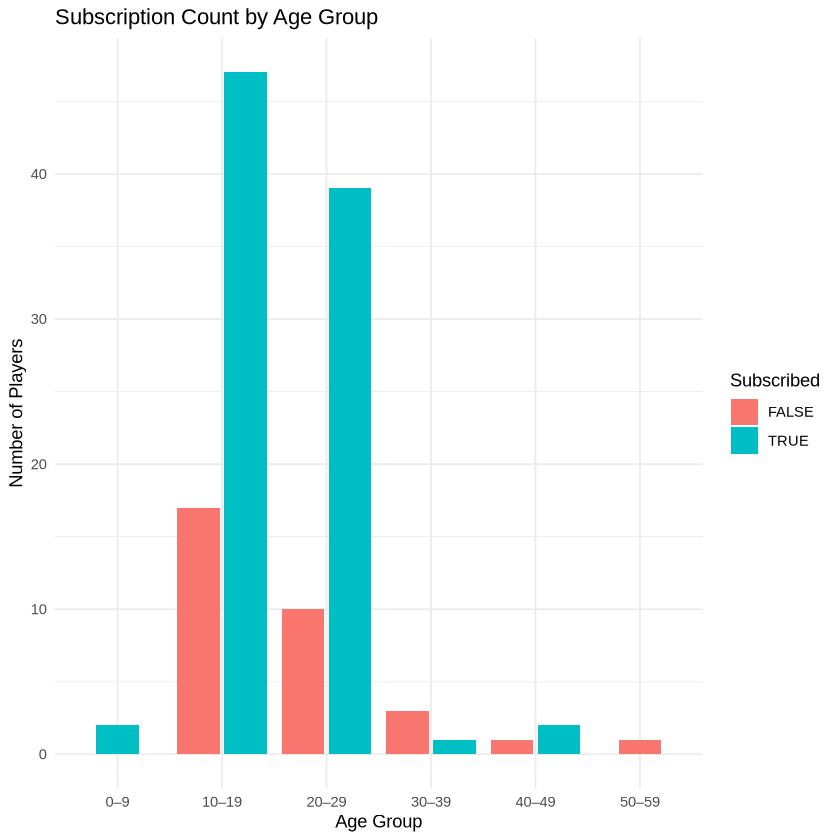

In [9]:

plot_subscription_count_by_age_group <- ggplot(model_data, aes(x = age_group, fill = subscribe)) +
  geom_bar(position = position_dodge2(preserve = "single")) +
  labs(
    title = "Subscription Count by Age Group",
    x = "Age Group",
    y = "Number of Players",
    fill = "Subscribed") +
  theme_minimal()

plot_subscription_count_by_age_group 




#### Figure 1. Subscription Count by Age Group. 

Bar chart showing player counts by age group and subscription status. Blue indicates subscribed, while red represents not subscribed. Most subscribers are in the 10 to 29 age range.


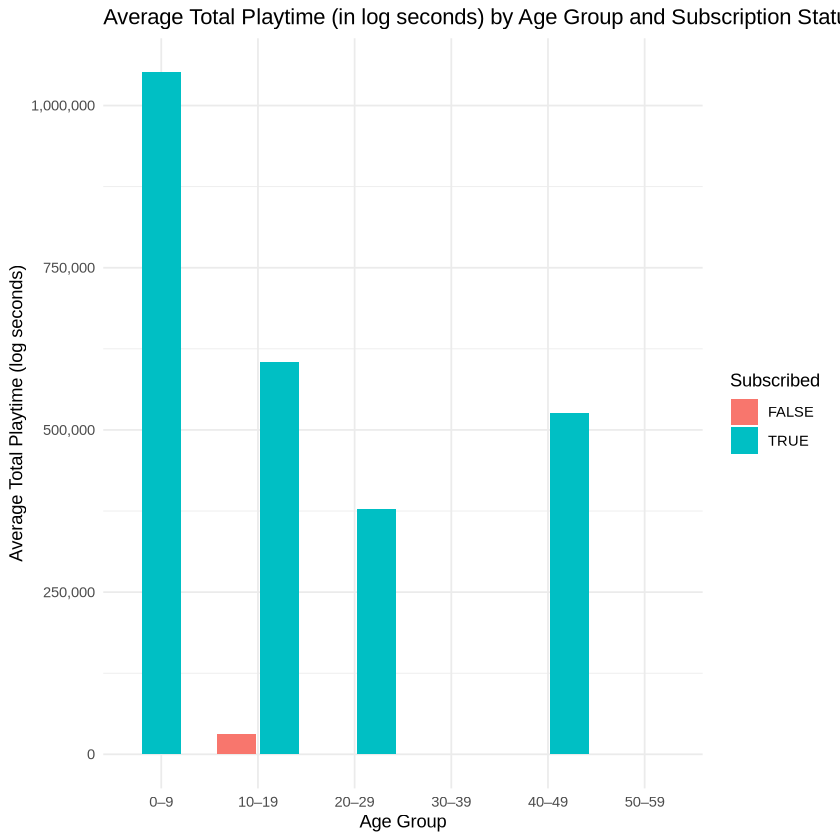

In [10]:
plot_grouped_bar_playtime <- ggplot(playtime_summary, aes(x = age_group, y = mean_playtime, fill = subscribe)) +
  geom_bar(stat = "identity", position = position_dodge2(preserve = "single")) +
  scale_y_continuous(labels = scales::comma_format(accuracy = 1)) +
 
  labs(
    title = "Average Total Playtime (in log seconds) by Age Group and Subscription Status",
    x = "Age Group",
    y = "Average Total Playtime (log seconds)",
    fill = "Subscribed") +
  theme_minimal()


plot_grouped_bar_playtime

#### Figure 2. Average total playtime (in log seconds) across age groups by newsletter subscription status. 

Bars show the average total playtime for each age group, divided by whether players subscribed (TRUE) or did not subscribe (FALSE). Rows without subscription status were excluded.

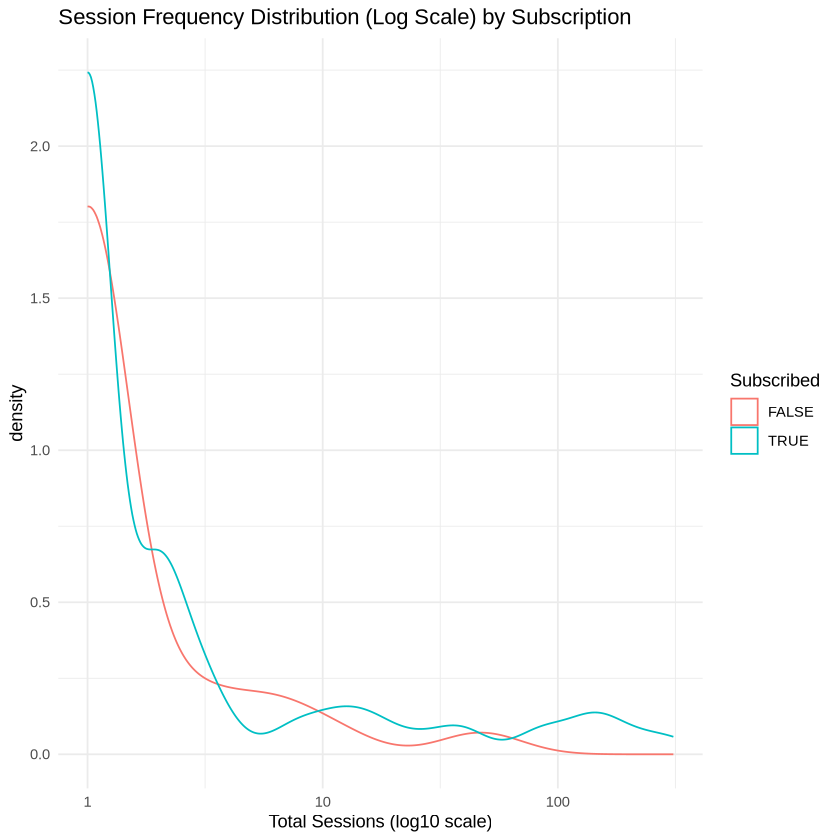

In [11]:
plot_session_density <- ggplot(model_data, aes(x = session_count, color = factor(subscribe))) +
  geom_density() +
  scale_x_log10() +
  labs(title = "Session Frequency Distribution (Log Scale) by Subscription",
    x = "Total Sessions (log10 scale)",
    color = "Subscribed") +
  theme_minimal()
plot_session_density

#### Figure 3. Session Frequency Distribution by Subscription.  
This density plot shows the distribution of total session counts (log scale) for subscribers and non-subscribers. Peaks indicate common session frequencies. The differences in the curves highlight how session activity may relate to the likelihood of subscribing.



To start the classification analysis, the code removes rows with missing subscribe values, converts logical values (TRUE/FALSE) to character labels ("1"/"0"), and then changes the column into a factor. This ensures that the target variable is formatted correctly for modelling.

In [12]:
model_data <- model_data |>
  filter(!is.na(subscribe)) |>
  mutate(
    subscribe = as.character(as.integer(subscribe)), 
    subscribe = factor(subscribe))                  
model_data

subscribe,Age,total_playtime,session_count,age_group
<fct>,<dbl>,<dbl>,<int>,<fct>
1,9,2.102335e+06,26,0–9
1,17,4.250000e+00,3,10–19
0,17,8.333333e-02,1,10–19
⋮,⋮,⋮,⋮,⋮
0,22,0.35000000,1,20–29
0,17,0.08333333,1,10–19
0,17,2.98333333,6,10–19


Subscribe is a binary response variable. Classification is necessary to determine whether new players are likely to become subscribers or not. KNN makes these predictions by utilizing the idea of "closeness" in feature space. 

Firstly, a random seed is set so that the results are reproducible, ensuring that everyone running the same code will obtain the same data split. 

Below, the model_data is split into training and testing sets. It's specified that prop = 0.75 so that the dataset is split into 75% for training and 25% for testing, while strata = subscribe, which ensures class balance so that we have a similar proportion of TRUE/FALSE in both sets. 

In [13]:

set.seed(123)
split <- initial_split(model_data, prop = 0.75, strata = subscribe)
train <- training(split)
test <- testing(split)



The recipe (...) outlines preprocessing for a KNN model, using Age, total_playtime, and session_count as predictors and subscribe as the outcome. These predictors are normalized by centring and scaling them using step_center() and step_scale(). For KNN, which depends on distance, this is essential because, without normalization, variables with a larger scale, like total_playtime, would overwhelm those with a smaller scale, like Age.

In [14]:
knn_recipe <- recipe(subscribe ~ Age + total_playtime + session_count, data = train) |> 
  step_center(all_predictors()) |> step_scale(all_predictors()) 
knn_recipe





── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 3



── Operations 

• Centering for: all_predictors()

• Scaling for: all_predictors()



### Model Assumptions 
Generally, KNN assumes that nearby observations in a given space are more likely to have similar outcomes. KNN is also a distance-based algorithm, so the predictors must be on comparable scales, using the step functions to meet this assumption.


This cell defines the KNN model setup for classification, with k (number of neighbours) remaining a tunable parameter to determine the ideal value later. It supports neat workflows with preprocessing steps by using equal weighting for all neighbours ("rectangular") and setting the modelling engine to "kknn."

In [15]:
knn_spec <- nearest_neighbor(
  mode = "classification",
  neighbors = tune(),
  weight_func = "rectangular") |> 
  set_engine("kknn")

knn_spec



K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


This step combines the preprocessing recipe and the KNN model definition to create a modelling workflow. A workflow ensures consistent application of all transformations and modelling operations, which is crucial for reliable tuning and evaluation.

In [16]:
knn_wf <- workflow() |> 
  add_recipe(knn_recipe) |> 
  add_model(knn_spec)
knn_wf 



══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_center()
• step_scale()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


This step determines the ideal number of neighbours (k) for the KNN model by hyperparameter tuning using 5-fold cross-validation. Accuracy and ROC AUC assess model performance over odd k values (1 to 25). This procedure guarantees that the chosen k generalizes well and prevents overfitting to a single train/test split by testing the model on several resampled splits of the training data.

In [17]:
set.seed(999)
folds <- vfold_cv(train, v = 5, strata = subscribe)

k_vals <- tibble(neighbors = seq(1, 25, by = 2))  

knn_results <- tune_grid(
  knn_wf,
  resamples = folds,
  grid = k_vals,
  metrics = metric_set(accuracy, roc_auc))



This step generates a visualization to help understand how the model's accuracy varies with varying values of k. By charting cross-validation accuracy against the number of neighbours, we can quickly determine which k provides the best performance and whether accuracy stabilizes or decreases at higher values. This visual confirmation supports a more knowledgeable and rational choice of the ideal k.

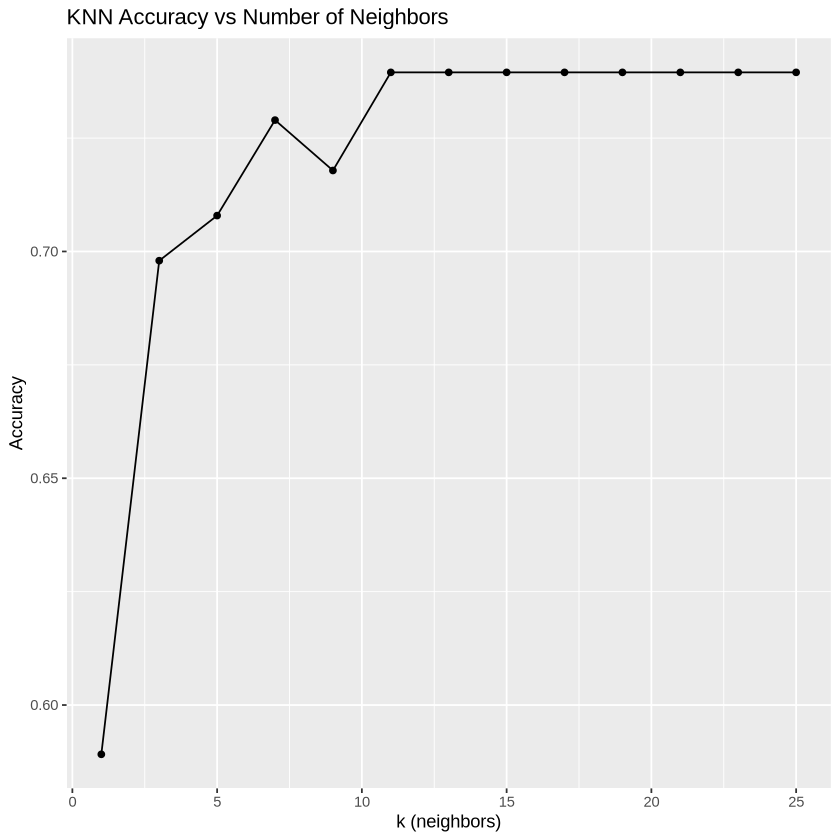

In [18]:
knn_plot <- knn_results |> 
  collect_metrics() |> 
  filter(.metric == "accuracy") |> 
  ggplot(aes(x = neighbors, y = mean)) +
  geom_line() + geom_point() +
  labs(title = "KNN Accuracy vs Number of Neighbors", x = "k (neighbors)", y = "Accuracy")

knn_plot


In this step, the model is finalized by re-training it with the optimal number of neighbours (k), determined by the highest cross-validation accuracy. Using last_fit(), the final KNN model is assessed on the validation set. This provides the final performance metrics required for reporting and validates how well the optimized model generalizes to unseen data.

In [19]:
best_k <- knn_results |> 
  select_best("accuracy")

final_knn_spec <- nearest_neighbor(
  mode = "classification",
  neighbors = best_k$neighbors,
  weight_func = "rectangular"
) |> 
  set_engine("kknn")

final_wf <- workflow() |> 
  add_recipe(knn_recipe) |> 
  add_model(final_knn_spec)

final_fit <- final_wf |> last_fit(split)

final_fit |> collect_metrics()



.metric,.estimator,.estimate,.config
<chr>,<chr>,<dbl>,<chr>
accuracy,binary,0.7419355,Preprocessor1_Model1
roc_auc,binary,0.6222826,Preprocessor1_Model1


This code creates a confusion matrix and classifies each prediction as a true or false positive or negative based on the subscription status. It then displays the count of each outcome in a bar plot. This helps evaluate model accuracy and any prediction bias.

          Truth
Prediction  0  1
         0  0  0
         1  8 23

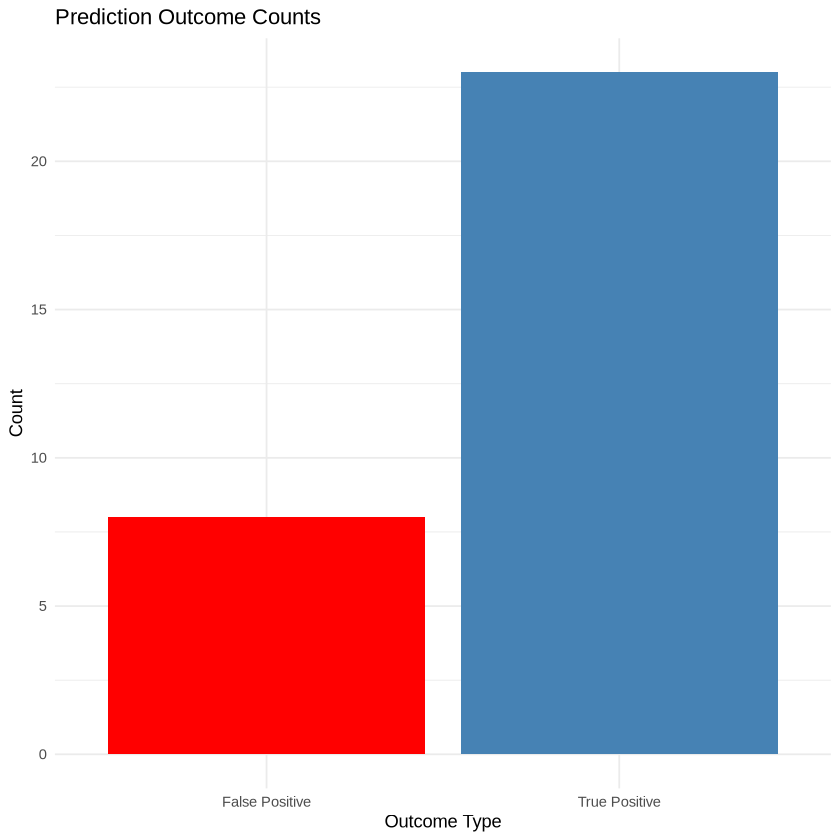

In [20]:

final_fit |> collect_predictions() |> 
  conf_mat(truth = subscribe, estimate = .pred_class)


prediction_data <- final_fit |> collect_predictions() |> 
  mutate(result_type = case_when(
    .pred_class == "1" & subscribe == 1 ~ "True Positive",
    .pred_class == "1" & subscribe == 0 ~ "False Positive",
    .pred_class == "0" & subscribe == 1 ~ "False Negative",
    .pred_class == "0" & subscribe == 0 ~ "True Negative"))

ggplot(prediction_data, aes(x = result_type)) +
  geom_bar(stat = "count", fill = c("red", "steelblue")) +
  labs(
    title = "Prediction Outcome Counts",
    x = "Outcome Type",
    y = "Count") +
  theme_minimal()




#### Figure 4. Distribution of prediction outcomes from the KNN model. 
True Positives represent correctly identified subscribers. False Positives are non-subscribers wrongly classified as subscribers. The lack of other outcome types shows class imbalance in the data.

### Confusion Matrix Insight

The confusion matrix provides counts of:

True Positives (TP): Subscribed and correctly predicted.

False Positives (FP): Did not subscribe but predicted to subscribe.

True Negatives (TN): Did not subscribe and correctly predicted.

False Negatives (FN): Subscribed but predicted not to.



### Model Limitations: 
The small sample size limits how broadly we can apply the findings. The behavioural features used may not fully capture player tendencies, and KNN often struggles when class distributions overlap, as our visualizations show. 

### Recommendations: 
This model is best for exploratory purposes, not high-stakes decision-making. In the future, it is crucial to compare KNN's performance to other classifiers, like decision trees or logistic regression, as this will provide valuable insights and guide future research.

# Results 
Using a classification approach, this project investigated whether a player's age, total playtime, and session frequency could predict whether they would sign up for a game-related newsletter. Since the objective was to categorize players into subscribed or not groups based on numerical and categorical attributes, a K-Nearest Neighbours (KNN) model classification was selected. I employed 5-fold cross-validation, which divided the training data into five folds to assess performance more robustly and ensure the model was dependable and not overfitting. This improved the model's generalizability and enabled me to determine the ideal value for k (number of neighbours).


According to Figure 1, "Subscription Count by Age Group," most subscribers are between 10 and 29, with very few older players signing up. This demonstrates how age is a reliable indicator. 

In Figure 2, "Average Total Playtime (log seconds) by Age Group and Subscription Status," subscribers have higher total playtimes than non-subscribers in nearly every age group, suggesting that overall playtime is also a powerful predictor of subscription behaviour. It's important to note that some bars were missing as their values were very small compared to the scale. 


Figure 3, "Session Frequency Distribution by Subscription," is a density plot illustrating the differences in session counts between subscribers and non-subscribers. Both groups are most active with lower session counts, but subscribers generally have slightly higher frequencies overall. These three visualizations indicate that session activity, frequency and age are key predictors of subscription behaviour.

The optimal k value was then ascertained using the KNN Accuracy vs. Number of Neighbours plot. As k increased, accuracy improved and plateaued at k = 7-8, which was determined to be the ideal value. According to the corresponding metrics table, the best model obtained a ROC AUC of 0.62 and an accuracy of 74.2%.

The model's ability to accurately identify most subscribers is a significant finding. However, it did not predict non-subscribers, indicating a strong bias toward the positive class. In particular, as shown in Figure 4, there are 23 true positives, 8 false negatives, and 0 false negatives and true negatives. This bias could be due to class imbalance or weak patterns among non-subscribers. The prediction probability plot confirmed this issue, providing valuable insights for our analysis.

Overall, the classification model showed a clear connection between behaviour and subscription. The model's reliability was further confirmed through cross-validation, with age and playtime emerging as better predictors than session frequency. However, the dataset's imbalance likely led the model to predict subscriptions consistently.



# Discussion 
This study discovered that while session frequency had less impact on newsletter subscription, age and total playtime were powerful predictors. In general, subscribers had significantly more playtime overall, and younger players (ages 10–29) subscribed at higher rates. Cross-validation helped guarantee dependable results, and the KNN model's accuracy was approximately 74%.

These results mostly matched expectations, as higher engagement was assumed to lead to subscriptions. However, the strong role of age—and the weaker role of session count—was somewhat unexpected, suggesting that how long players play matters more than how often they play.

These insights could help developers target subscription prompts more effectively, focusing on younger and highly active users. This could improve marketing efficiency and user retention.

Future questions include whether adding variables like in-game behaviour or purchase history would improve predictions and how subscription trends change with different newsletter formats or timing.      
